In [30]:
import pandas as pd
import urllib.request
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime

Download national dataset (Italy)

In [18]:
data_file = './data.csv'
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
urllib.request.urlretrieve(url, data_file)

('./data.csv', <http.client.HTTPMessage at 0x1c584dd5d48>)

In [19]:
df = pd.read_csv(
    data_file,
    parse_dates=['data']
).sort_values(by='data')
tot_att_pos = df['totale_attualmente_positivi'][:-1]

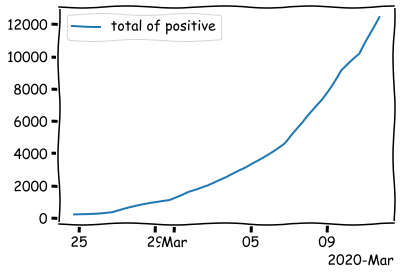

In [22]:
with plt.xkcd():
    plt.plot(df['data'], df['totale_casi'], label='total of positive')
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    ax = plt.gca()
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    plt.legend()

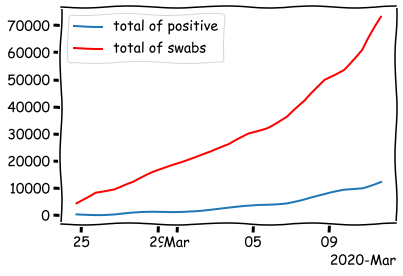

In [21]:
with plt.xkcd():
    plt.plot(df['data'], df['totale_casi'], label='total of positive')
    plt.plot(df['data'], df['tamponi'], 'r', label='total of swabs')
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    ax = plt.gca()
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    plt.legend()

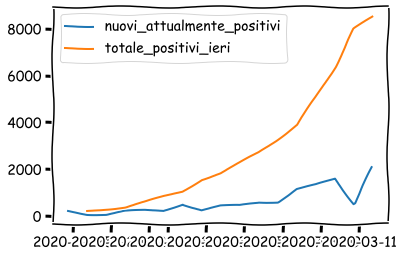

In [9]:
with plt.xkcd():
    plt.plot(df['data'], df['nuovi_attualmente_positivi'], label='nuovi_attualmente_positivi')
    plt.plot(df['data'], df['totale_positivi_ieri'], label='totale_positivi_ieri')
    plt.legend()

In [7]:
df['totale_positivi_ieri'] = [None] + list(tot_att_pos)
df['grow_rate'] = df['nuovi_attualmente_positivi'] / df['totale_positivi_ieri']

In [11]:
from statsmodels.stats.proportion import proportion_confint


In [12]:
def ci_low(new, ieri):
    low, upp = proportion_confint(new, ieri, alpha=0.01, method='normal')
    return low

def ci_upp(new, ieri):
    low, upp = proportion_confint(new, ieri, alpha=0.01, method='normal')
    return upp

In [14]:
df['ci_low'] = df.apply(lambda r: ci_low(r['nuovi_attualmente_positivi'], r['totale_positivi_ieri']), axis=1)
df['ci_upp'] = df.apply(lambda r: ci_upp(r['nuovi_attualmente_positivi'], r['totale_positivi_ieri']), axis=1)

No handles with labels found to put in legend.


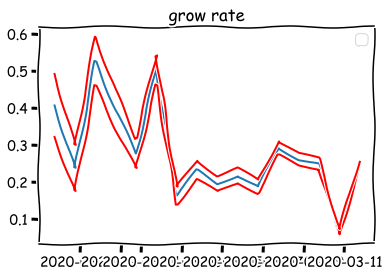

In [15]:
with plt.xkcd():
    plt.plot(df['data'], df['grow_rate'])
    plt.plot(df['data'], df['ci_low'], 'r')
    plt.plot(df['data'], df['ci_upp'], 'r')
    plt.title('grow rate')
    plt.legend()

Import forecasts

In [23]:
forecast = pd.read_csv('forecast.csv',parse_dates=['data_sotto_50'])

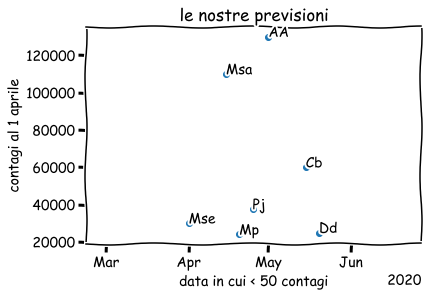

In [44]:
with plt.xkcd():
    x = forecast['data_sotto_50']
    y = forecast['tot_1_aprile']
    plt.scatter(x, y)
    for i, txt in enumerate(forecast['nome']):
        plt.annotate(txt, (x[i], y[i]))
    #plt.axvline(datetime.date(2020,3,11))
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    ax = plt.gca()
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    plt.xlabel('data in cui < 50 contagi')
    plt.ylabel('contagi al 1 aprile')
    plt.title('le nostre previsioni')

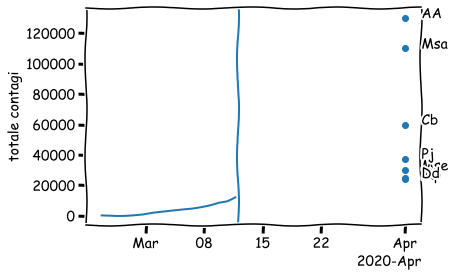

In [55]:
with plt.xkcd():
    plt.plot(df['data'], df['totale_casi'], label='total of positive')
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    ax = plt.gca()
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    y = forecast['tot_1_aprile']
    x = [datetime.date(2020,4,1)] * len(y)
    plt.scatter(x, y)
    for i, txt in enumerate(forecast['nome']):
        plt.annotate(txt, (x[i]+datetime.timedelta(days=2), y[i]))
    plt.axvline(datetime.date(2020,3,12))
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    ax = plt.gca()
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    plt.ylabel('totale contagi')

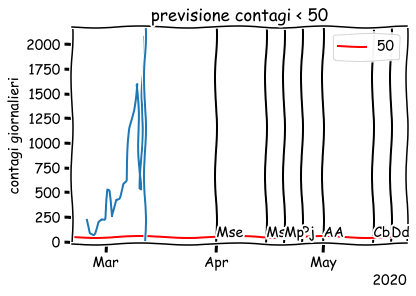

In [68]:
with plt.xkcd():
    plt.plot(df['data'], df['nuovi_attualmente_positivi'])
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    ax = plt.gca()
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    for d, txt in zip(forecast['data_sotto_50'], forecast['nome']):
        plt.axvline(d, c='black')
        plt.annotate(txt, (d, 50))
    plt.axhline(50, c='r', label='50')
    plt.axvline(datetime.date(2020,3,12))
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    ax = plt.gca()
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    plt.ylabel('contagi giornalieri')
    plt.title('previsione contagi < 50')
    plt.legend()